In [14]:
pip install --upgrade scipy

  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl (44.7 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shaki\\anaconda3\\Lib\\site-packages\\scipy\\fft\\_pocketfft\\pypocketfft.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow==2.12.0rc0 tensorflow-io==0.29.0 

  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl (44.7 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shaki\\anaconda3\\Lib\\site-packages\\scipy\\fft\\_pocketfft\\pypocketfft.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
import pandas as pd
import numpy as np
np.random.seed(0)
# from sklearn.metrics import precision_score,recall_score,f1_score
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix

In [16]:
data = pd.read_csv("C:\\Users\\shaki\\Downloads\\drebin-215-dataset-5560malware-9476-benign.csv\\drebin-215-dataset-5560malware-9476-benign.csv")
print("Total missing values : ",sum(list(data.isna().sum())))
data


Total missing values :  0


C:\Users\shaki\AppData\Local\Temp\ipykernel_19052\2658235643.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\shaki\\Downloads\\drebin-215-dataset-5560malware-9476-benign.csv\\drebin-215-dataset-5560malware-9476-benign.csv")


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [17]:
classes,count = np.unique(data['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
data=data.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data


[0 1] ['B' 'S']
Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [18]:
print("Total Features : ",len(data.columns)-1)

Total Features :  215


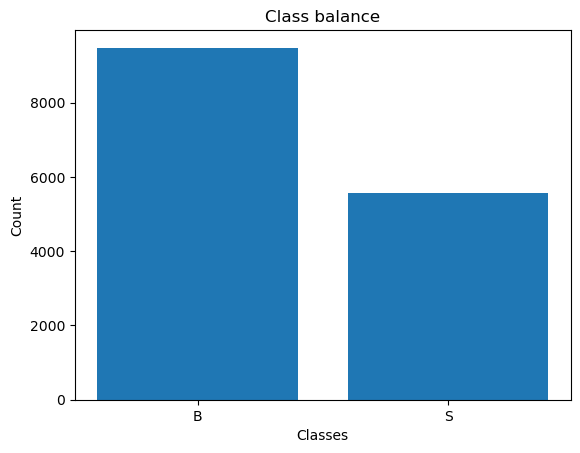

In [19]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [20]:
from sklearn.utils import resample
# Separate features and labels
X = data.drop("class", axis=1)
y = data["class"]

# Count the occurrences of each class
class_counts = y.value_counts()

# Calculate the majority and minority class labels
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Separate majority and minority class samples
majority_samples = data[data["class"] == majority_class]
minority_samples = data[data["class"] == minority_class]

# Oversample the minority class to match the majority class
minority_oversampled = resample(minority_samples,
                                 replace=True,      # Sample with replacement
                                 n_samples=len(majority_samples),  # Match majority class
                                 random_state=0)    # Set random seed for reproducibility
# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([majority_samples, minority_oversampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=0)

# Now, balanced_data contains the balanced dataset with equal instances of both classes

In [21]:
# Count the occurrences of each class in the balanced dataset
balanced_class_counts = balanced_data["class"].value_counts()

# Print the class counts
print(balanced_class_counts)

class
1    9476
0    9476
Name: count, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y = train_test_split(data[data.columns[:len(data.columns)-1]].to_numpy(),
                                                 data[data.columns[-1]].to_numpy(),
                                                  test_size = 0.2,
                                                  shuffle=True)

In [23]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  12024
Train labels size :  12024
Test features size :  3007
Test features size :  3007


In [24]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024,)
Test Features :  (3007, 215)
Test labels :  (3007,)


In [25]:
train_y = train_y.reshape((-1,1))
test_y = test_y.reshape((-1,1))

In [26]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)


Train features :  (12024, 215)
Train labels :  (12024, 1)
Test Features :  (3007, 215)
Test labels :  (3007, 1)


  # HeatMap


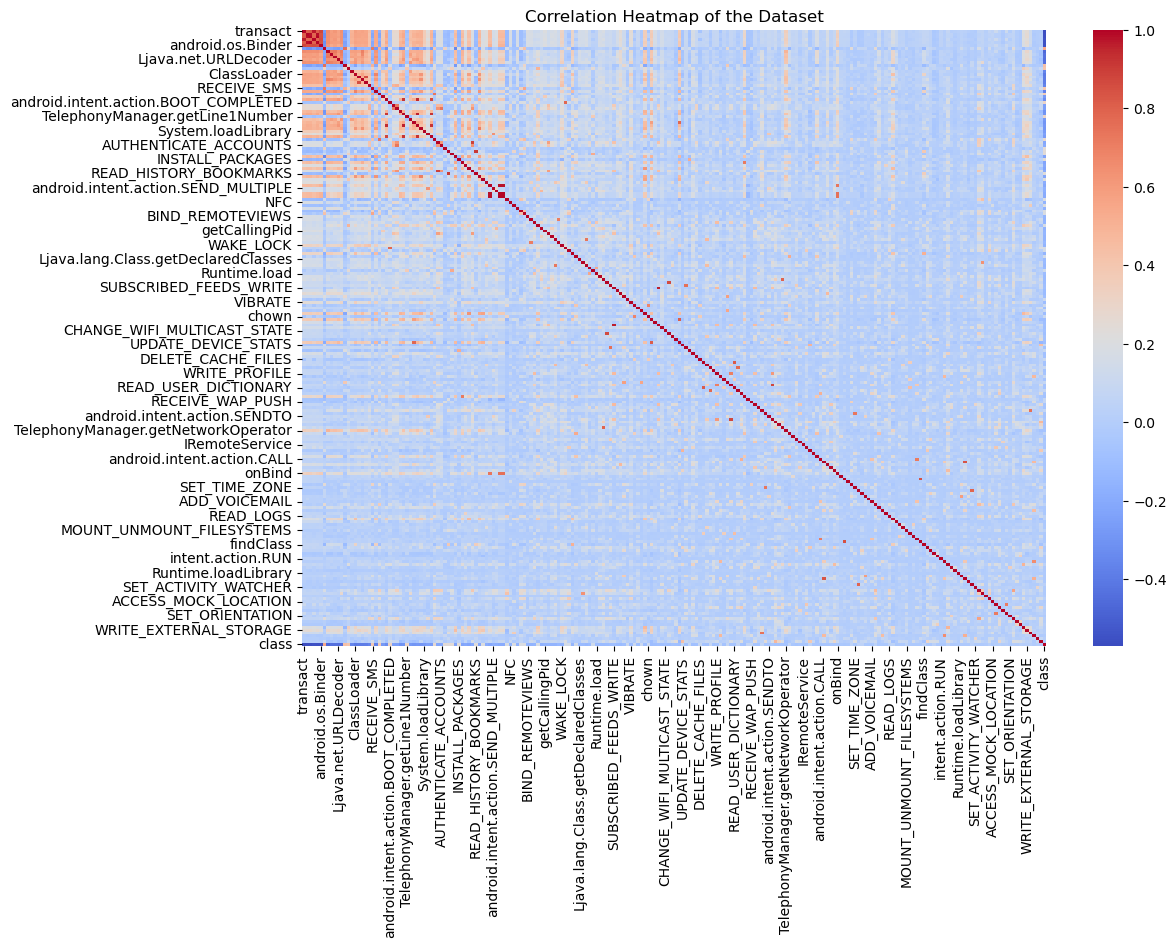

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of the Dataset")
plt.show()

# DECISION TREE

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


# SUPPORT VECTOR MACHINE

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [34]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
kernel_list = ['linear', 'poly', 'rbf']

for kernel in kernel_list:
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy:.2f}")

Accuracy with linear kernel: 0.98
Accuracy with poly kernel: 0.96
Accuracy with rbf kernel: 0.98


# Logistic Regression

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)


C:\Users\shaki\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [41]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


 # K-Nearest Neighbour

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [43]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
k = 5  # You can set the number of neighbors (k) as needed
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [46]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


# Random Forest

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [48]:
X = data.iloc[:, :-1] # Features
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
#Make predictions and evaluate the model
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# ROC AUC Score
y_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')


Accuracy: 0.99
Confusion Matrix:
[[1880    6]
 [  31 1090]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1886
           1       0.99      0.97      0.98      1121

    accuracy                           0.99      3007
   macro avg       0.99      0.98      0.99      3007
weighted avg       0.99      0.99      0.99      3007

ROC AUC Score: 1.00


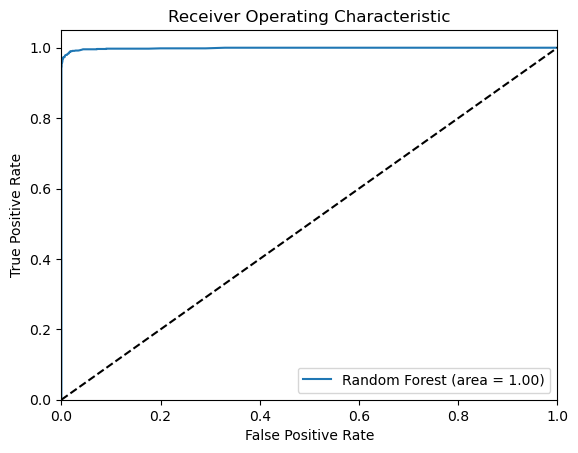

In [51]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# VISUALISING ALL ACCURACIES IN TERMS OF THE GRAPH

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

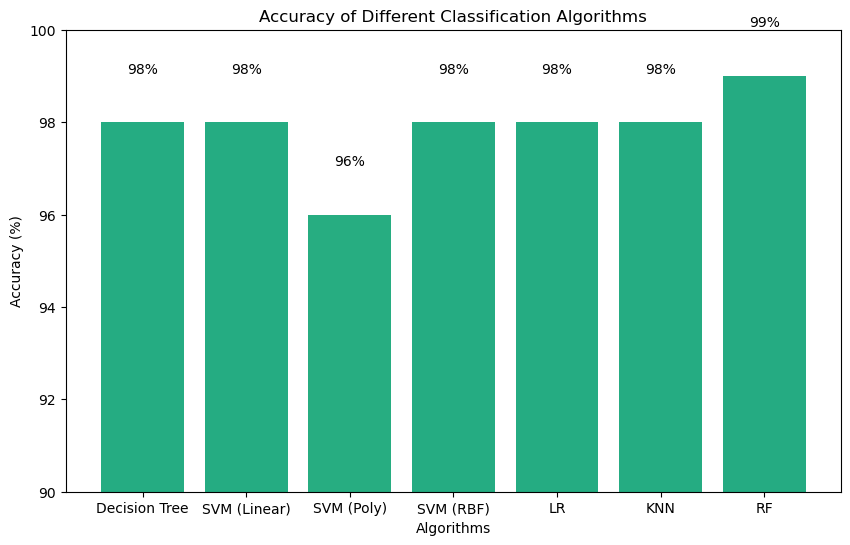

In [52]:
import matplotlib.pyplot as plt

# Names of the algorithms
algorithms = ['Decision Tree', 'SVM (Linear)', 'SVM (Poly)', 'SVM (RBF)', 'LR', 'KNN', 'RF']

# Corresponding accuracy values
accuracies = [98, 98, 96, 98, 98, 98, 99]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a colorful bar graph
colors = plt.cm.viridis_r(accuracies)  # Use a colormap to generate colors
bars = plt.bar(algorithms, accuracies, color=colors)

# Add data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom', fontsize=10)

# Customize plot elements
plt.title('Accuracy of Different Classification Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)  # Set the y-axis limits

# Show the colorful legend indicating the accuracy range
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis_r, norm=plt.Normalize(vmin=min(accuracies), vmax=max(accuracies)))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Accuracy Range')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# Roc Auc

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
svm = SVC(probability=True)
decision_tree = DecisionTreeClassifier()

# Train the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Predict probabilities
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
decision_tree_probs = decision_tree.predict_proba(X_test)[:, 1]

# Calculate ROC AUC scores
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
decision_tree_auc = roc_auc_score(y_test, decision_tree_probs)

# Print ROC AUC scores
print(f'Logistic Regression ROC AUC: {log_reg_auc}')
print(f'KNN ROC AUC: {knn_auc}')
print(f'SVM ROC AUC: {svm_auc}')
print(f'Decision Tree ROC AUC: {decision_tree_auc}')

# Plot ROC Curves
plt.figure(figsize=(10, 8))

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree_probs)

plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree (AUC = {decision_tree_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


# F1 Score

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report

In [ ]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()

# Train the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Predict the labels
log_reg_preds = log_reg.predict(X_test)
knn_preds = knn.predict(X_test)
svm_preds = svm.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)

# Calculate F1 scores
log_reg_f1 = f1_score(y_test, log_reg_preds, average='weighted')
knn_f1 = f1_score(y_test, knn_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_preds, average='weighted')

# Print F1 scores
print(f'Logistic Regression F1 Score: {log_reg_f1}')
print(f'KNN F1 Score: {knn_f1}')
print(f'SVM F1 Score: {svm_f1}')
print(f'Decision Tree F1 Score: {decision_tree_f1}')

# Print detailed classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_preds))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_preds))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_preds))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, decision_tree_preds))

 # MULTILAYER PERCEPTRON


In [53]:
import numpy as np
import pandas as pd

In [58]:
# one-hot encoding
y = pd.get_dummies(data["class"])
y

,0,1
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
15031,True,False
15032,True,False
15033,True,False
15034,True,False


In [61]:
x = data.drop(["transact","class"],axis=1)
x

,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
15032,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
15034,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,1,1,0,0,0


In [62]:
# split our dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [63]:
x_train

,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
13906,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
6985,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
14956,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
5709,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10298,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
12633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12722,1,1,1,1,1,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
532,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
y_train

,0,1
13906,True,False
6985,True,False
14956,True,False
5709,True,False
10298,True,False
...,...,...
2018,False,True
12633,True,False
12722,True,False
532,False,True


# Creating our model --> MULTILAYER PERCEPTRON

In [74]:
pip install numpy pandas scikit-learn tensorflow keras

  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl (44.7 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shaki\\anaconda3\\Lib\\site-packages\\scipy\\cluster\\_hierarchy.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [99]:
# Assuming the last column is the label
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
# Initialize the model
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
263/263 [==============================] - 3s 3ms/step - loss: 0.1158 - accuracy: 0.9585 - val_loss: 0.0693 - val_accuracy: 0.9781
Epoch 2/10
263/263 [==============================] - 1s 2ms/step - loss: 0.0425 - accuracy: 0.9863 - val_loss: 0.0516 - val_accuracy: 0.9800
Epoch 3/10
263/263 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0504 - val_accuracy: 0.9838
Epoch 4/10
263/263 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 0.0547 - val_accuracy: 0.9819
Epoch 5/10
263/263 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0639 - val_accuracy: 0.9829
Epoch 6/10
263/263 [==============================] - 1s 3ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.0788 - val_accuracy: 0.9810
Epoch 7/10
263/263 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0784 - val_accuracy: 0.9796
Epoch 

In [102]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print(classification_report(y_test, y_pred))

141/141 [==============================] - 0s 1ms/step
Accuracy: 0.9831485587583149
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2831
           1       0.99      0.96      0.98      1679

    accuracy                           0.98      4510
   macro avg       0.98      0.98      0.98      4510
weighted avg       0.98      0.98      0.98      4510



In [103]:
model.save('android_malware_mlp_model.h5')


In [104]:
print(scaler.n_features_in_)

215


In [105]:
score = model.evaluate(X_test,y_test)
print("ACCURACY : ",score)

141/141 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9831
ACCURACY :  [0.09119608998298645, 0.9831485748291016]


In [106]:
data.head(5)

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [111]:
score = model.evaluate(X_train,y_train)
print("ACCURACY : ",score)

329/329 [==============================] - 1s 2ms/step - loss: 0.0408 - accuracy: 0.9899
ACCURACY :  [0.04079977050423622, 0.9899249076843262]


# 1D-CNN

In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout


In [121]:
# Assume the last column is the label
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for 1D-CNN: (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [122]:
model = Sequential()

# 1D Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# Another Conv layer (optional)
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 213, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 106, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 106, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 104, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 52, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)          

In [123]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
263/263 [==============================] - 6s 15ms/step - loss: 0.2585 - accuracy: 0.8856 - val_loss: 0.1204 - val_accuracy: 0.9587
Epoch 2/10
263/263 [==============================] - 4s 14ms/step - loss: 0.1515 - accuracy: 0.9451 - val_loss: 0.1050 - val_accuracy: 0.9629
Epoch 3/10
263/263 [==============================] - 4s 15ms/step - loss: 0.1273 - accuracy: 0.9534 - val_loss: 0.0996 - val_accuracy: 0.9620
Epoch 4/10
263/263 [==============================] - 4s 14ms/step - loss: 0.1222 - accuracy: 0.9556 - val_loss: 0.0884 - val_accuracy: 0.9691
Epoch 5/10
263/263 [==============================] - 4s 14ms/step - loss: 0.1075 - accuracy: 0.9630 - val_loss: 0.1023 - val_accuracy: 0.9615
Epoch 6/10
263/263 [==============================] - 3s 12ms/step - loss: 0.1005 - accuracy: 0.9655 - val_loss: 0.0817 - val_accuracy: 0.9696
Epoch 7/10
263/263 [==============================] - 4s 13ms/step - loss: 0.0901 - accuracy: 0.9665 - val_loss: 0.0795 - val_accuracy: 0.9710

In [124]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


141/141 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9749
Test Accuracy: 97.49%


In [126]:
score = model.evaluate(X_test,y_test)
print("ACCURACY : ",score)

141/141 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9749
ACCURACY :  [0.06894044578075409, 0.9749445915222168]


In [127]:
score = model.evaluate(X_train,y_train)
print("ACCURACY : ",score)

329/329 [==============================] - 1s 4ms/step - loss: 0.0493 - accuracy: 0.9862
ACCURACY :  [0.049297451972961426, 0.9862180352210999]


In [129]:
num_features = data.shape[1] - 1  # Exclude the label column
print(f'Total number of features: {num_features}')

# Print all feature numbers
feature_numbers = list(range(1, num_features + 1))
print('Feature numbers:', feature_numbers)

Total number of features: 215
Feature numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

In [130]:
new_data = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215]])  # 
new_data_scaled = scaler.transform(new_data)
new_data_scaled = new_data_scaled.reshape(new_data_scaled.shape[0], new_data_scaled.shape[1], 1)

# Predict
prediction = (model.predict(new_data_scaled) > 0.5).astype("int32")
print(f'Prediction: {prediction}')

1/1 [==============================] - 0s 126ms/step
Prediction: [[0]]


In [131]:
features = data.iloc[:, :-1]  # Adjust if label column is not the last column

# Print the feature names (if available) and their corresponding values
for i, column in enumerate(features.columns, start=1):
    print(f'Feature {i} ({column}):')
    print(features[column].values)
    print()

Feature 1 (transact):
[0 0 0 ... 0 1 1]

Feature 2 (onServiceConnected):
[0 0 0 ... 0 1 1]

Feature 3 (bindService):
[0 0 0 ... 0 1 1]

Feature 4 (attachInterface):
[0 0 0 ... 0 1 1]

Feature 5 (ServiceConnection):
[0 0 0 ... 0 1 1]

Feature 6 (android.os.Binder):
[0 0 0 ... 0 1 1]

Feature 7 (SEND_SMS):
[1 1 1 ... 0 0 0]

Feature 8 (Ljava.lang.Class.getCanonicalName):
[0 0 0 ... 0 1 1]

Feature 9 (Ljava.lang.Class.getMethods):
[0 0 0 ... 0 1 1]

Feature 10 (Ljava.lang.Class.cast):
[0 0 0 ... 0 1 1]

Feature 11 (Ljava.net.URLDecoder):
[0 0 0 ... 0 1 1]

Feature 12 (android.content.pm.Signature):
[0 0 0 ... 0 1 1]

Feature 13 (android.telephony.SmsManager):
[1 1 1 ... 0 0 0]

Feature 14 (READ_PHONE_STATE):
[1 1 1 ... 1 0 0]

Feature 15 (getBinder):
[0 0 0 ... 0 0 1]

Feature 16 (ClassLoader):
[0 0 0 ... 0 1 1]

Feature 17 (Landroid.content.Context.registerReceiver):
[1 1 0 ... 0 1 1]

Feature 18 (Ljava.lang.Class.getField):
[0 0 1 ... 0 1 1]

Feature 19 (Landroid.content.Context.unregis